In [1]:
%matplotlib inline

# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import matplotlib.pyplot as plt
import numpy as np

# custom code
import context
from module import example

In [12]:
example.hello()
example.add_two(-3)

hello


-1

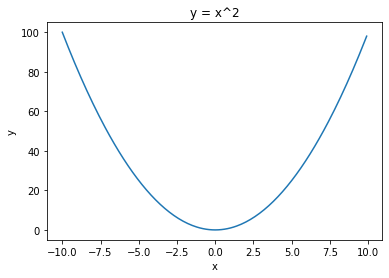

In [20]:
x_series = np.arange(-10,10,0.1)
y_series = map(example.parabola, x_series)


plt.plot(list(x_series), list(y_series))
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = x^2");


In [6]:
prepare_circuit = example.prepare_01_circuit()
prepare_circuit.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [12]:
from qiskit.quantum_info import Statevector

statevector = Statevector.from_instruction(prepare_circuit)
print(statevector.data)

[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


In [21]:
measure_circuit = example.measure_circuit(2)
measure_circuit.draw()

░ ┌─┐   
   q_0: ─░─┤M├───
         ░ └╥┘┌─┐
   q_1: ─░──╫─┤M├
         ░  ║ └╥┘
meas_0: ════╩══╬═
               ║ 
meas_1: ═══════╩═

In [24]:
prepare_measure_circuit = prepare_circuit + measure_circuit
prepare_measure_circuit.draw()

░ ┌─┐   
   q_0: ──────░─┤M├───
        ┌───┐ ░ └╥┘┌─┐
   q_1: ┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
meas_0: ═════════╩══╬═
                    ║ 
meas_1: ════════════╩═

In [16]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [30]:
quantum_system = provider.get_backend("ibmq_qasm_simulator")

job = execute(prepare_measure_circuit, backend=quantum_system, shots=1000)
from qiskit.tools.monitor import *
job_monitor(job)

Job Status: job has successfully run


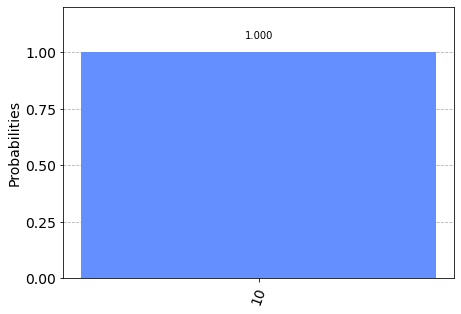

In [28]:
counts = job.result().get_counts(prepare_measure_circuit)
plot_histogram(counts)